# IN3050/IN4050 Mandatory Assignment 3: Unsupervised Learning

**Name:** Niklas Alexsander

### Rules

Before you begin the exercise, review the rules at this website: https://www.uio.no/english/studies/examinations/compulsory-activities/mn-ifi-mandatory.html (This is an individual assignment. You are not allowed to deliver together or copy/share source-code/answers with others.)

### Delivery

**Deadline**: Thursday, April 30th, 2020, 23:59

Your submission should be delivered in Devilry. You may redeliver in Devilry before the deadline, but include all files in the last delivery, as only the last delivery will be read. You are recommended to upload preliminary versions hours (or days) before the final deadline.

### What to deliver?

You are recommended to solve the exercise in a Jupyter notebook, but you might solve it in a Python program if you prefer.

If you choose Jupyter, you should deliver the notebook. You should answer all questions and explain what you are doing in Markdown. Still, the code should be properly commented. The notebook should contain results of your runs. In addition, you should make a pdf of your solution. (If you have problems making a pdf at your own machine, you can make it at the IFI linux cluster.)

If you prefer not to use notebooks, you should deliver the code, your run results, and a pdf-report where you answer all the questions and explain your work.

Your report/notebook should contain your name and username.

Deliver one single zipped folder (.zip, .tgz or .tar.gz) which contains your complete solution.

Important: if you weren’t able to finish the assignment, use the PDF report/Markdown to elaborate on what you’ve tried and what problems you encountered. Students who have made an effort and attempted all parts of the assignment will get a second chance even if they fail initially. This exercise will be graded PASS/FAIL.

### Goals of the exercise
This exercise has three parts. The first part is focused on Principal Component Analysis (PCA). You will go through some basic theory, and implent PCA from scratch to do compression and visualization of data.

The second part focuses on clustering using K-means. You will use `scikit-learn` to run K-means clustering, and use PCA to visualize the results.

The last part ties supervised and unsupervised learning together in an effort to evaluate the output of K-means using a logistic regression for multi-class classification approach.

The master students will also have to do one extra part about tuning PCA to balance compression with information lost.


### Tools
You may freely use code from the weekly exercises and the published solutions. In the first part about PCA you may **NOT** use ML libraries like `scikit-learn`. In the K-means part and beyond we encurage the use of `scikit-learn` to iterate quickly on the problems.

### Beware
This is a new assignment. There might occur typos or ambiguities. If anything is unclear, do not hesitate to ask. Also, if you think some assumptions are missing, make your
own and explain them!

## Principal Component Analysis (PCA)
In this section, you will work with the PCA algorithm in order to understand its definition and explore its uses.

### Principle of Maximum Variance: what is PCA supposed to do?
First of all, let us recall the principle/assumption of PCA:
1. What is the variance?
3. What is the covariance?
3. How do we compute the covariance matrix?
2. What is the meaning of the principle of maximum variance?
4. Why do we need this principle?
5. Does the principle always apply?

**Answers:** Enter your answers here.

In [1]:
"""
1. Variance is the difference/spread of a given data set from its mean value.
2. Covariance is how variables change together, if they are 'moving' in the same way with different parameters.
3. To calculate the covariance matrix of a given set X (Centered) we take the set X multiplied by itself transposed multiplied 
   by the 1/N where N is the number of elements. 1/N(X.T * X).
4. The meaning of the principle of maximum variance is that the PCA is created in a way that makes the first 
   k components get the maximized variance, and the last k elements as the ones with the minimized variance. 
   
5. If we can maximize the spread of the data, we may be able to perserve usefull information! This information 
   can be used to visualize, compress and decompress our data.
6. The principle does not always apply. For example when all the PCA components have high variance, the will be no 
   'guarantee' that we get a small loss of data in the compression. Knowlegde of the domain is really important with 
   PCA.
"""

"\n1. Variance is the difference/spread of a given data set from its mean value.\n2. Covariance is how variables change together, if they are 'moving' in the same way with different parameters.\n3. To calculate the covariance matrix of a given set X (Centered) we take the set X multiplied by itself transposed multiplied \n   by the 1/N where N is the number of elements. 1/N(X.T * X).\n4. The meaning of the principle of maximum variance is that the PCA is created in a way that makes the first \n   k components get the maximized variance, and the last k elements as the ones with the minimized variance. \n   \n5. If we can maximize the spread of the data, we may be able to perserve usefull information! This information \n   can be used to visualize, compress and decompress our data.\n6. The principle does not always apply. For example when all the PCA components have high variance, the will be no \n   'guarantee' that we get a small loss of data in the compression. Knowlegde of the domain

## Implementation: how is PCA implemented?
Here we implement the basic steps of PCA and we assemble them.

### Importing libraries
We start importing the *numpy* library for performing matrix computations, the *pyplot* library for plotting data, and the *syntheticdata* module to import synthetic data.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import syntheticdata

### Centering the Data
Implement a function with the following signature to center the data as explained in *Marsland*.

In [3]:
def center_data(A):
    # INPUT:
    # A    [NxM] numpy data matrix (N samples, M features)
    #
    # OUTPUT:
    # X    [NxM] numpy centered data matrix (N samples, M features)
    
    # Mean value of each column
    mean_values = np.mean(A, axis=0)
    
    # Centering the data by subtracting the mean from the dataset.
    X = A - mean_values
    return X

Test your function checking the following assertion on *testcase*:

In [4]:
testcase = np.array([[3.,11.,4.3],[4.,5.,4.3],[5.,17.,4.5],[4,13.,4.4]])
answer = np.array([[-1.,-0.5,-0.075],[0.,-6.5,-0.075],[1.,5.5,0.125],[0.,1.5,0.025]])
np.testing.assert_array_almost_equal(center_data(testcase), answer)

### Computing Covariance Matrix
Implement a function with the following signature to compute the covariance matrix as explained in *Marsland*.

In [5]:
def compute_covariance_matrix(A):
    # INPUT:
    # A    [NxM] centered numpy data matrix (N samples, M features)
    #
    # OUTPUT:
    # C    [MxM] numpy covariance matrix (M features, M features)
    #
    # Do not apply centering here. We assume that A is centered before this function is called.
    
    # Convariance calculated as done in Marsland.
    C = np.cov(A.T)
    return C

Test your function checking the following assertion on *testcase*:

In [6]:
testcase = center_data(np.array([[22.,11.,5.5],[10.,5.,2.5],[34.,17.,8.5],[28.,14.,7]]))
answer = np.array([[580.,290.,145.],[290.,145.,72.5],[145.,72.5,36.25]])

# Depending on implementation the scale can be different:
to_test = compute_covariance_matrix(testcase)

answer = answer/answer[0, 0]
to_test = to_test/to_test[0, 0]

np.testing.assert_array_almost_equal(to_test, answer)

### Computing eigenvalues and eigenvectors
Uses the linear algebra package of `numpy` and its function `np.linalg.eig()` to compute eigenvalues and eigenvectors. Notice that we take the real part of the eigenvectors and eigenvalues. The covriance matrix *should* be a symmetric matrix, but the actual implementation in `compute_covariance_matrix()` can lead to small round off errors that lead to tiny imaginary additions to the eigenvalues and eigenvectors. These are purly numerical artifacts that we can safely remove.

**Note:** If you decide to NOT use `np.linalg.eig()` you must make sure that the eigenvalues you compute are of unit lenght!

In [7]:
def compute_eigenvalue_eigenvectors(A):
    # INPUT:
    # A    [DxD] numpy matrix
    #
    # OUTPUT:
    # eigval    [D] numpy vector of eigenvalues
    # eigvec    [DxD] numpy array of eigenvectors
    
    # Eigenvalues and eigenvectors
    eigval, eigvec = np.linalg.eig(A)
    
    
    # Numerical roundoff can lead to (tiny) imaginary parts. We correct that here.
    eigval = eigval.real
    eigvec = eigvec.real
    
    return eigval, eigvec

Test your function checking the following assertion on *testcase*:

In [8]:
testcase = np.array([[2,0,0],[0,5,0],[0,0,3]])
answer1 = np.array([2.,5.,3.])
answer2 = np.array([[1.,0.,0.],[0.,1.,0.],[0.,0.,1.]])
x,y = compute_eigenvalue_eigenvectors(testcase)
np.testing.assert_array_almost_equal(x, answer1)
np.testing.assert_array_almost_equal(y, answer2)

### Sorting eigenvalues and eigenvectors
Implement a function with the following signature to sort eigenvalues and eigenvectors as explained in *Marsland*.

Remember that eigenvalue *eigval[i]* corresponds to eigenvector *eigvec[:,i]*.

In [9]:
def sort_eigenvalue_eigenvectors(eigval, eigvec):
    # INPUT:
    # eigval    [D] numpy vector of eigenvalues
    # eigvec    [DxD] numpy array of eigenvectors
    #
    # OUTPUT:
    # sorted_eigval    [D] numpy vector of eigenvalues
    # sorted_eigvec    [DxD] numpy array of eigenvectors
    
    # Sorting the eigenvalues and eigenvectors as in Marsland
    indices = np.argsort(eigval)
    indices = indices[::-1]
    sorted_eigvec = eigvec[:,indices]
    sorted_eigval = eigval[indices]
    
    return sorted_eigval, sorted_eigvec

Test your function checking the following assertion on *testcase*:

In [10]:
testcase = np.array([[2,0,0],[0,5,0],[0,0,3]])
answer1 = np.array([5.,3.,2.])
answer2 = np.array([[0.,0.,1.],[1.,0.,0.],[0.,1.,0.]])
x,y = compute_eigenvalue_eigenvectors(testcase)
x,y = sort_eigenvalue_eigenvectors(x,y)
np.testing.assert_array_almost_equal(x, answer1)
np.testing.assert_array_almost_equal(y, answer2)

### PCA Algorithm
Implement a function with the following signature to compute PCA as explained in *Marsland* using the functions implemented above.

In [11]:
def pca(A,m):
    # INPUT:
    # A    [NxM] numpy data matrix (N samples, M features)
    # m    integer number denoting the number of learned features (m <= M)
    #
    # OUTPUT:
    # pca_eigvec    [Mxm] numpy matrix containing the eigenvectors (M dimensions, m eigenvectors)
    # P             [Nxm] numpy PCA data matrix (N samples, m features)
    
    # Center the data
    X = center_data(A)
    # Covariance matrix
    C = compute_covariance_matrix(X)
    # Eigenvalues and eigenvectors
    vals, vecs = compute_eigenvalue_eigenvectors(C)
    # Sorting the eigenvalues and eigenvectors
    sorted_vals, pca_eigvec = sort_eigenvalue_eigenvectors(vals, vecs)
    
    # Getting rid of some vecs if m is more than 0
    if m > 0:
        pca_eigvec = pca_eigvec[:,:m]
    
    P = np.dot(pca_eigvec.T, X.T)
    
    return pca_eigvec, P.T

Test your function checking the following assertion on *testcase*:

In [12]:
testcase = np.array([[22.,11.,5.5],[10.,5.,2.5],[34.,17.,8.5]])
x,y = pca(testcase,2)

import pickle
answer1_file = open('PCAanswer1.pkl','rb'); answer2_file = open('PCAanswer2.pkl','rb')
answer1 = pickle.load(answer1_file); answer2 = pickle.load(answer2_file)


test_arr_x = np.sum(np.abs(np.abs(x) - np.abs(answer1)), axis=0)
np.testing.assert_array_almost_equal(test_arr_x, np.zeros(2))


test_arr_y = np.sum(np.abs(np.abs(y) - np.abs(answer2)))
np.testing.assert_almost_equal(test_arr_y, 0)

## Understanding: how does PCA work?
We now use the PCA algorithm you implemented on a toy data set in order to understand its inner workings.

### Loading the data
The module *syntheticdata* provides a small synthetic dataset of dimension [100x2] (100 samples, 2 features).

In [13]:
X = syntheticdata.get_synthetic_data1()

### Visualizing the data
Visualize the synthetic data using the function *scatter()* from the *matplotlib* library.

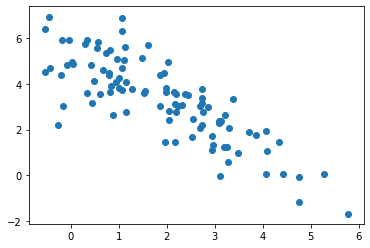

In [14]:
plt.scatter(X[:,0],X[:,1])

### Visualize the centered data
Notice that the data visualized above is not centered on the origin (0,0). Use the function defined above to center the data, and the replot it.

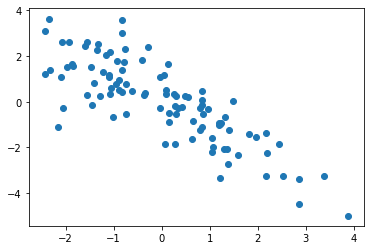

In [15]:
# Centering the data
X_centered = center_data(X)
plt.scatter(X_centered[:,0], X_centered[:,1])

### Visualize the first eigenvector
Visualize the vector defined by the first eigenvector.
To do this you need:
- Use the *PCA()* function to recover the eigenvectors
- Plot the centered data as done above 
- The first eigenvector is a 2D vector (x0,y0). This defines a vector with origin in (0,0) and head in (x0,y0). Use the function *plot()* from matplotlib to plot a line over the first eigenvector.

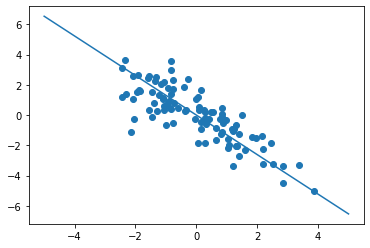

In [16]:
# PCA to get eigenvectors
pca_eigvec, _ = pca(X, 2)
first_eigvec = pca_eigvec[0]

#Plotting the centered data
plt.scatter(X_centered[:,0], X_centered[:,1])

# array of evenly spaced numbers
x = np.linspace(-5, 5, 1000)
# our calculated values with our eigenvector and x.
y = first_eigvec[1]/first_eigvec[0] * x

# plotting our new line through the centered data.
plt.plot(x,y)

### Visualize the PCA projection
Finally, use the *PCA()* algorithm to project on a single dimension and visualize the result using again the *scatter()* function.

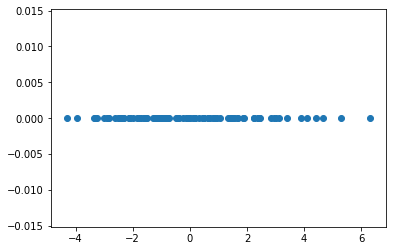

In [17]:
_,P = pca(X, X.shape[1])
# Creating 'y' as an array of zeros to get in on one axis.
array_with_all_zeros = np.zeros(P[:,0].shape)
plt.scatter(P[:, 0], array_with_all_zeros)

## Evaluation: when are the results of PCA sensible?
So far we have used PCA on synthetic data. Let us now imagine we are using PCA as a pre-processing step before a classification task. This is a common setup with high-dimensional data. We explore when the use of PCA is sensible.

### Loading the first set of labels
The function *get_synthetic_data_with_labels1()* from the module *syntethicdata* provides a first labeled dataset.

In [18]:
X,y = syntheticdata.get_synthetic_data_with_labels1()

### Running PCA
Process the data using the PCA algorithm and project it in one dimension. Plot the labeled data using *scatter()* before and after running PCA. Comment on the results.

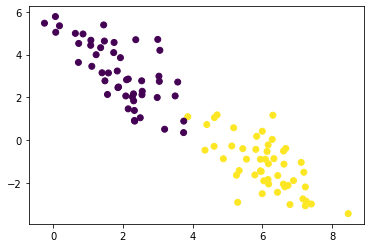

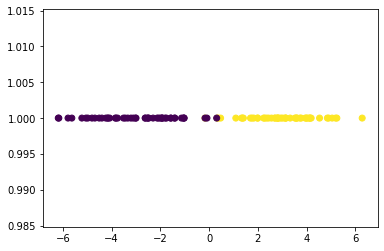

In [19]:
plt.scatter(X[:,0],X[:,1],c=y[:,0])

plt.figure()
# Running pca
_,P = pca(X,X.shape[1])
# Plotting the result
plt.scatter(P[:,0],np.ones(P.shape[0]),c=y[:,0])

**Comment:** Enter your comment here.

In [20]:
"""
When first plotting the data set we can see that the scattered plots are close to a 'linear regression line' close to the x (x-axis) value of 4.
But when we run the pca first and then apply the labels to see what has changed, we see that if we think about a linear regression line in our 
pca the line would be in the center of 0! The pca-algorithm managed to find the separation of the plotted points classes 
without knowing/'training' with the labels!
"""

"\nWhen first plotting the data set we can see that the scattered plots are close to a 'linear regression line' close to the x (x-axis) value of 4.\nBut when we run the pca first and then apply the labels to see what has changed, we see that if we think about a linear regression line in our \npca the line would be in the center of 0! The pca-algorithm managed to find the separation of the plotted points classes \nwithout knowing/'training' with the labels!\n"

### Loading the second set of labels
The function *get_synthetic_data_with_labels2()* from the module *syntethicdata* provides a second labeled dataset.

In [21]:
X,y = syntheticdata.get_synthetic_data_with_labels2()

### Running PCA
As before, process the data using the PCA algorithm and project it in one dimension. Plot the labeled data using *scatter()* before and after running PCA. Comment on the results.

(100, 1)


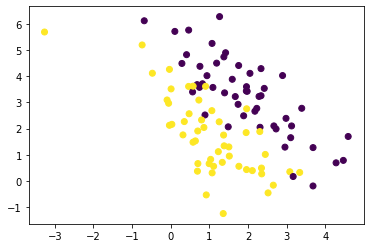

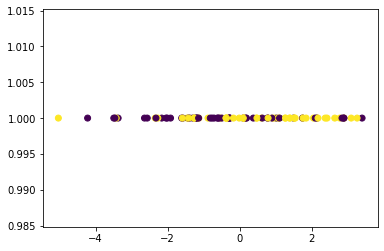

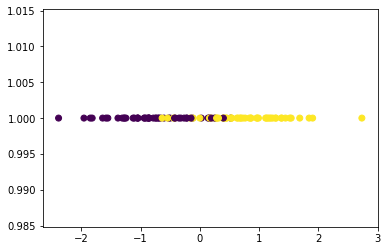

In [22]:
print(y.shape)
plt.scatter(X[:,0],X[:,1],c=y[:,0])

plt.figure()
_,P = pca(X,X.shape[1])
plt.scatter(P[:,0],np.ones(P.shape[0]),c=y[:,0])

plt.figure()
plt.scatter(P[:,1],np.ones(P.shape[0]),c=y[:,0])

**Comment:** Enter your comment here.

In [23]:
"""
Here the results are totally different, the plots are all over the axis, and not really separable by using the x-axis of 
0. But if we change the P[:,0] to [P:,1] the plots gets more even over the x-axis and we are able to see a better difference 
between the plotted labels at x-axis 0. The spread of P[:,0] looks a bit 'left-sided' compared to the more balanced P[:,1].
"""

"\nHere the results are totally different, the plots are all over the axis, and not really separable by using the x-axis of \n0. But if we change the P[:,0] to [P:,1] the plots gets more even over the x-axis and we are able to see a better difference \nbetween the plotted labels at x-axis 0. The spread of P[:,0] looks a bit 'left-sided' compared to the more balanced P[:,1].\n"

How would the result change if you were to consider the second eigenvector? Or if you were to consider both eigenvectors?

**Answer**: Enter your answer here.

In [24]:
"""If we change the P[:,0] to [P:,1] the plots gets more even over the x-axis and we are able to see a better difference 
between the plotted labels at x-axis 0. The spread of P[:,0] looks a bit 'left-sided' compared to the more balanced P[:,1]."""

"If we change the P[:,0] to [P:,1] the plots gets more even over the x-axis and we are able to see a better difference \nbetween the plotted labels at x-axis 0. The spread of P[:,0] looks a bit 'left-sided' compared to the more balanced P[:,1]."

## Case study 1: PCA for visualization
We now consider the *iris* dataset, a simple collection of data (N=150) describing iris flowers with four (M=4) features. The features are: Sepal Length, Sepal Width, Petal Length and Petal Width. Each sample has a label, identifying each flower as one of 3 possible types of iris: Setosa, Versicolour, and Virginica.

Visualizing a 4-dimensional dataset is impossible; therefore we will use PCA to project our data in 2 dimensions and visualize it.

### Loading the data
The function *get_iris_data()* from the module *syntethicdata* returns the *iris* dataset. It returns a data matrix of dimension [150x4] and a label vector of dimension [150].

In [25]:
X,y = syntheticdata.get_iris_data()

### Visualizing the data by selecting features
Try to visualize the data (using label information) by randomly selecting two out of the four features of the data. You may try different pairs of features.

Text(0.5, 1.0, 'Random features 2 and 0')

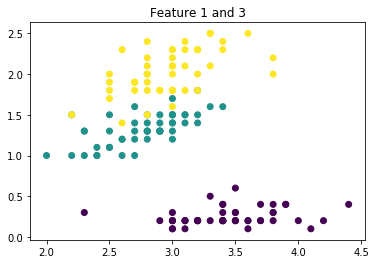

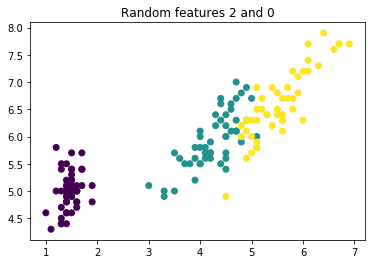

In [26]:
# Selecting two features by hand.
feat_1 = 1
feat_2 = 3

#Plotting the features
plt.scatter(X[:,feat_1],X[:,feat_2],c=y)
plt.title("Feature 1 and 3")



# Number of unique classes
number_of_classes = len(set(y))

# random number chosen from 0 to the number of unique classes
feat_1 = np.random.randint(0, high=number_of_classes)
feat_2 = np.random.randint(0, high=number_of_classes)

# If feature 2 is the same as feature 1. We want two randomly selected features where f1 != f2.
while feat_2 == feat_1:
    feat_2 = np.random.randint(0, high=number_of_classes)


plt.figure()

# Plotting a random set of two features
plt.scatter(X[:,feat_1],X[:,feat_2],c=y)
plt.title(f"Random features {feat_1} and {feat_2}")


### Visualizing the data by PCA
Process the data using PCA and visualize it (using label information). Compare with the previous visualization and comment on the results.

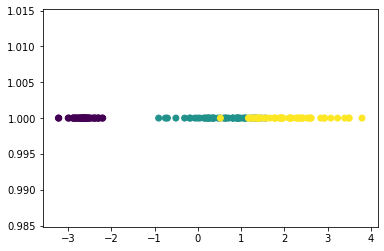

In [27]:
plt.figure()
_,P = pca(X,X.shape[1])
plt.scatter(P[:,0],np.ones(P.shape[0]),c=y)

**Comment:** Enter your comment here.

In [28]:
"""
While plotting I used the features x=1 and y=3 (feature 2 and 4).
While looking at the visualization of the two features before pca we see that there is a clear difference between the 
green-blue'ish and yellow class to the purple class. My thoughts before PCA was that this difference should be visible 
also after the PCA.

When running the PCA and plotting the results the purple class gets pushed all the way to the left by itself, a good 
reflection of the plot before. The green-blue'ish class is together with the yellow class and is close to being 
differenciated by the x-axis point 1. There is a clear difference between the three classes even after the PCA!
"""

"\nWhile plotting I used the features x=1 and y=3 (feature 2 and 4).\nWhile looking at the visualization of the two features before pca we see that there is a clear difference between the \ngreen-blue'ish and yellow class to the purple class. My thoughts before PCA was that this difference should be visible \nalso after the PCA.\n\nWhen running the PCA and plotting the results the purple class gets pushed all the way to the left by itself, a good \nreflection of the plot before. The green-blue'ish class is together with the yellow class and is close to being \ndifferenciated by the x-axis point 1. There is a clear difference between the three classes even after the PCA!\n"

## Case study 2: PCA for compression
We now consider the *faces in the wild (lfw)* dataset, a collection of pictures (N=1280) of people. Each pixel in the image is a feature (M=2914).

### Loading the data
The function *get_lfw_data()* from the module *syntethicdata* returns the *lfw* dataset. It returns a data matrix of dimension [1280x2914] and a label vector of dimension [1280]. It also returns two parameters, $h$ and $w$, reporting the height and the width of the images (these parameters are necessary to plot the data samples as images).

In [29]:
X,y,h,w = syntheticdata.get_lfw_data()

### Inspecting the data
Choose one datapoint to visualize (first coordinate of the matrix $X$) and use the function [imshow()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.imshow.html) to plot and inspect some of the pictures.

Notice that *imshow* receives as a first argument an image to be plot; the image must be provided as a rectangular matrix, therefore we reshape a sample from the matrix $X$ to have height $h$ and width $w$. The parameter *cmap* specifies the color coding; in our case we will visualize the image in black-and-white with different gradations of grey.

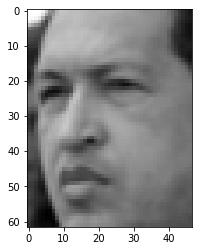

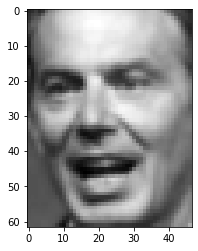

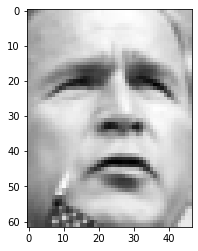

In [30]:
# Looping from 0 to 3, to plot three faces.
for image_index in range(0,3):
    plt.figure()
    plt.imshow(X[image_index,:].reshape((h, w)), cmap=plt.cm.gray)

### Implementing a compression-decompression function
Implement a function that first uses PCA to project samples in low-dimensions, and the reconstruct the original image.

*Hint:* Most of the code is the same as the previous PCA() function you implemented. You may want to refer to *Marsland* to check out how reconstruction is performed.

In [31]:
def encode_decode_pca(A,m):
    # INPUT:
    # A    [NxM] numpy data matrix (N samples, M features)
    # m    integer number denoting the number of learned features (m <= M)
    #
    # OUTPUT:
    # Ahat [NxM] numpy PCA reconstructed data matrix (N samples, M features)
    
    # Calculating the eigen_vecors and the matrix with PCA.
    eig_vecs,P = pca(A,m)
    
    #Decoding the PCA, reversing the calculations.
    Ahat = np.dot(P,eig_vecs.T)
    
    return Ahat

### Compressing and decompressing the data
Use the implemented function to encode and decode the data by projecting on a lower dimensional space of dimension 200 (m=200).

In [32]:
Xhat = encode_decode_pca(X,200)

### Inspecting the reconstructed data
Use the function *imshow* to plot and compare original and reconstructed pictures. Comment on the results.

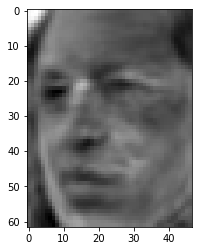

In [33]:
plt.imshow(Xhat[0,:].reshape((h, w)), cmap=plt.cm.gray)

**Comment:** Enter your comment here.

In [34]:
"""
After compressing and decompressing the 'image' the face is still present, not quite as sharp as the original, 
alot darker but still visible. So most of the data got 'reconstructed' after decompression, but it's no 'lossless' 
compression.
"""

"\nAfter compressing and decompressing the 'image' the face is still present, not quite as sharp as the original, \nalot darker but still visible. So most of the data got 'reconstructed' after decompression, but it's no 'lossless' \ncompression.\n"

### Evaluating different compressions
Use the previous setup to generate compressed images using different values of low dimensions in the PCA algorithm (e.g.: 100, 200, 500, 1000). Plot and comment on the results.

encode_decode 1 of 4
encode_decode 2 of 4
encode_decode 3 of 4
encode_decode 4 of 4
Done!


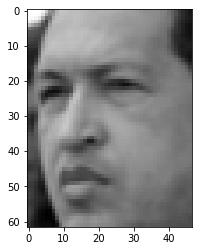

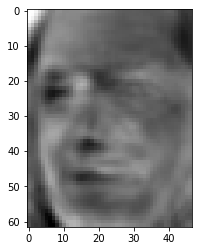

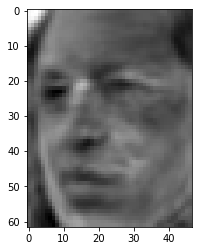

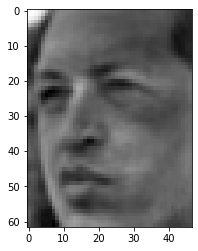

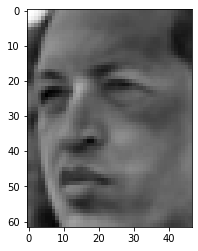

In [35]:
# TEST OF COMPRESS and DECOMPRESS at different numbers of dimensions

# plotting the first image.
plt.imshow(X[0,:].reshape((h, w)), cmap=plt.cm.gray)

plt.figure()
print("encode_decode 1 of 4")
Xhat = encode_decode_pca(X,100)
# Plotting the decompressed image
plt.imshow(Xhat[0,:].reshape((h, w)), cmap=plt.cm.gray)

plt.figure()
print("encode_decode 2 of 4")
Xhat = encode_decode_pca(X,200)
# Plotting the decompressed image
plt.imshow(Xhat[0,:].reshape((h, w)), cmap=plt.cm.gray)

plt.figure()
print("encode_decode 3 of 4")
Xhat = encode_decode_pca(X,500)
# Plotting the decompressed image
plt.imshow(Xhat[0,:].reshape((h, w)), cmap=plt.cm.gray)

plt.figure()
print("encode_decode 4 of 4")
Xhat = encode_decode_pca(X,1000)
print("Done!")
# Plotting the decompressed image
plt.imshow(Xhat[0,:].reshape((h, w)), cmap=plt.cm.gray)

**Comment:** Enter your comment here.

In [36]:
"""
When compressing and decompressing an image with more and more dimesions the decompression delivers an image that is 
closer and closer to the original, meaning that most of the data gets reverted back to the original, ofc not 
totally lossless.
"""

'\nWhen compressing and decompressing an image with more and more dimesions the decompression delivers an image that is \ncloser and closer to the original, meaning that most of the data gets reverted back to the original, ofc not \ntotally lossless.\n'

## Master Students: PCA Tuning
If we use PCA for compression or decompression, it may be not trivial to decide how many dimensions to keep. In this section we review a principled way to decide how many dimensions to keep.

The number of dimensions to keep is the only *hyper-parameter* of PCA. A method designed to decide how many dimensions/eigenvectors is the *proportion of variance*:
$$ \textrm{POV}=\frac{\sum_{i=1}^{m}{\lambda_{i}}}{\sum_{j=1}^{M}{\lambda_{j}}}, $$
where $\lambda$ are eigenvalues, $M$ is the dimensionality of the original data, and $m$ is the chosen lower dimensionality. 

Using the $POV$ formula we may select a number $M$ of dimensions/eigenvalues so that the proportion of variance is, for instance, equal to 95%.

Implement a new PCA for encoding and decoding that receives in input not the number of dimensions for projection, but the amount of proportion of variance to be preserved.

In [37]:
def encode_decode_pca_with_pov(A,p):
    # INPUT:
    # A    [NxM] numpy data matrix (N samples, M features)
    # p    float number between 0 and 1 denoting the POV to be preserved
    #
    # OUTPUT:
    # Ahat [NxM] numpy PCA reconstructed data matrix (N samples, M features)
    # m    integer reporting the number of dimensions selected
    
    m = None
    Ahat = None
    
    return Ahat,m

Import the *lfw* dataset using the *get_lfw_data()* in *syntheticdata*. Use the implemented function to encode and decode the data by projecting on a lower dimensional space such that POV=0.9. Use the function *imshow* to plot and compare original and reconstructed pictures. Comment on the results.

In [38]:
X,y,h,w = syntheticdata.get_lfw_data()

In [39]:
Xhat,m = encode_decode_pca_with_pov(X,None)

**Comment:** Enter your comment here.

## K-Means Clustering
In this section you will use the *k-means clustering* algorithm to perform unsupervised clustering. Then you will perform a qualitative assesment of the results.

### Importing scikit-learn library
We start importing the module *cluster.KMeans* from the standard machine learning library *scikit-learn*.

In [40]:
from sklearn.cluster import KMeans

### Loading the data
We will use once again the *iris* data set. The function *get_iris_data()* from the module *syntethicdata* returns the *iris* dataset. It returns a data matrix of dimension [150x4] and a label vector of dimension [150].

In [41]:
X,y = syntheticdata.get_iris_data()

### Projecting the data using PCA
To allow for visualization, we project our data in two dimensions as we did previously. This step is not necessary, and we may want to try to use *k-means* later without the PCA pre-processing. However, we use PCA, as this will allow for an easy visualization.

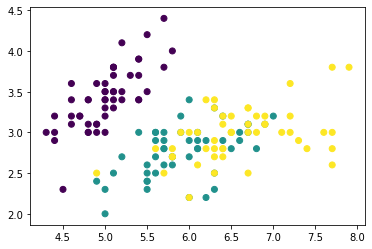

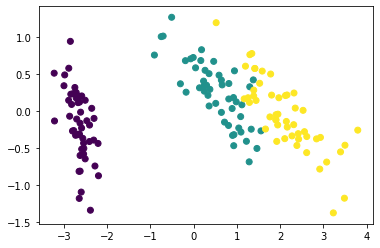

In [42]:
# Before.
plt.scatter(X[:,0],X[:,1],c=y)

# projecting the data to two dimensions.
_,P = pca(X,2)

# After
plt.figure()
plt.scatter(P[:,0],P[:,1],c=y)

### Running k-means
Use the class *KMeans* to fit and predict the output of the *k-means* algorithm on the projected data. Run the algorithm using the following values of $k=\{2,3,4,5\}$. 

In [43]:
# Storing the yhat-results in a list
yhat_list = []

# Looping over the yhats, and plotting
for x in [2,3,4,5]:
    KM = KMeans(n_clusters=x)
    yhat = KM.fit_predict(P)
    yhat_list.append(yhat)



### Qualitative assessment
Plot the results of running the k-means algorithm, compare with the true labels, and comment.

Text(0.5, 1.0, 'Original data')

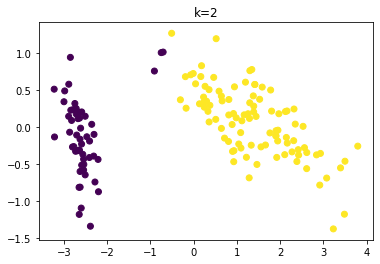

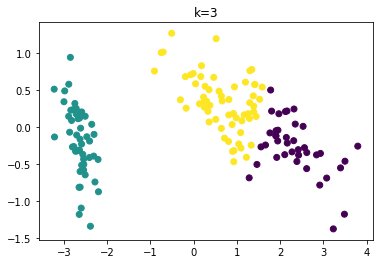

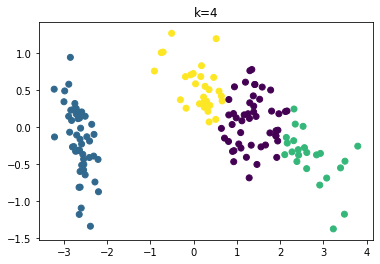

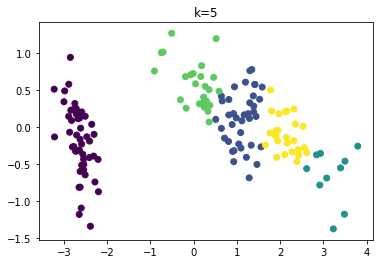

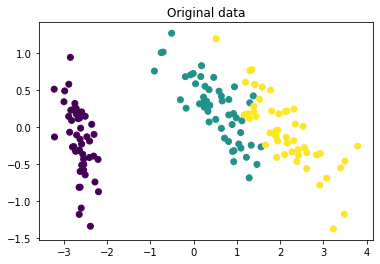

In [44]:
k_counter = 2
# Looping over the yhats, and plotting
for x in yhat_list:
    plt.figure()
    plt.scatter(P[:,0],P[:,1],c=x)
    plt.title(f'k={k_counter}')
    k_counter += 1

# Plotting the original data with its labels
plt.figure()
plt.scatter(P[:,0],P[:,1],c=y)
plt.title('Original data')

**Comment:** Enter your comment here.

In [45]:
"""With each cluster added the k-means algorithm 'finds' new 'groups' in the data. It is therefore important 
to have knowledge of the domain before picking the amount of clusters. The k=5 doesn't look any more wrong than the 
correct k=3. However, increasing the cluster number and seeing some clear difference could be a pointer in the 
direction that there is maybe another way of looking at the data."""

"With each cluster added the k-means algorithm 'finds' new 'groups' in the data. It is therefore important \nto have knowledge of the domain before picking the amount of clusters. The k=5 doesn't look any more wrong than the \ncorrect k=3. However, increasing the cluster number and seeing some clear difference could be a pointer in the \ndirection that there is maybe another way of looking at the data."

## Quantitative Assessment of K-Means

We used k-means for clustering and we assessed the results qualitatively by visualizing them. However we often want to be able to measure in a quantitative way how good the clustering was. To do this, we will use a classification task to evaluate numerically the goodness of the representation learned via k-means.

Reload the *iris* dataset. Import a standard `LogisticRegression` classifier from the module `sklearn.linear_model`. Use the k-means representations learned previously (`yhat2,...,yhat5`) and the true label to train the classifier. Evaluate your model on the training data (we do not have a test set, so this procedure will assess the model fit instead of generalization) using the `accuracy_score()` function from the *sklearn.metrics* module. Plot a graph showing how the accuracy score varies when changing the value of k. Comment on the results.

- Train a Logistic regression model using the first two dimensions of the PCA of the iris data set as input, and the true classes as targets.
- Report the model fit/accuracy on the training set.
- For each value of K:
  - One-Hot-Encode the classes outputed by the K-means algorithm.
  - Train a Logistic regression model on the K-means classes as input vs the real classes as targets.
  - Calculate model fit/accuracy vs. value of K.
- Plot your results in a graph and comment on the K-means fit.

In [46]:
def scalar_to_array(scalar_list):
    """
    Turns a scalar set into an array.
    
    If there are three unique labels in the scalar_list. 
    The output array would look something like:
    [0,1,2] = [[1,0,0],[0,1,0],[0,0,1]]
    
        args:
            scalar_list(numpy array): Containing scalars (LABELS)
            
        return:
            (numpy ndarray): an array of arrays containing the size of unique labels.
    
    """
    # n unique labels.
    n = len(set(scalar_list)) 
    
    # Final array. 
    array_t_train = []
    
    # Iterate over each label 
    for x in scalar_list:
        array_rep = [0] * n 
        array_rep[x-1] = 1 
        array_t_train.append(array_rep)
    
    return np.asarray(array_t_train)

0.9666666666666667
accuracies: [0.6666666666666666, 0.8866666666666667, 0.84, 0.9066666666666666]


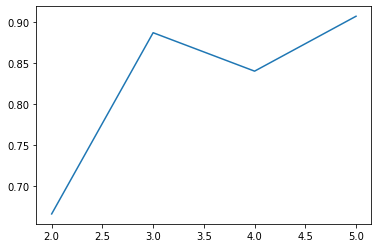

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Reloading the data
X,y = syntheticdata.get_iris_data()
_,P = pca(X,2)
# Using the solver='lbfgs' and multi_class='auto' to silence warnings
clf = LogisticRegression(solver='lbfgs', multi_class='auto').fit(P, y)
print(clf.score(P,y))
accuracy_score_list = []

plt.figure()
for x in yhat_list:
    x = scalar_to_array(x)
    # Using the solver='lbfgs' and multi_class='auto' to silence warnings
    clf = LogisticRegression(solver='lbfgs', multi_class='auto').fit(x, y)
    predicted = clf.predict(x)
    acc_sc = metrics.accuracy_score(predicted, y)
    accuracy_score_list.append(acc_sc)

print("accuracies:", accuracy_score_list)

# Plotting the results
plt.plot([2,3,4,5], accuracy_score_list)

**Comment:** Enter your comment here.

In [48]:
"""
As the k-value increases, so does the accuracy as well, with an exception at k=4 which could be an effect of 
the given data set. The reason for the increasing accuracy comes from what the k-value actually does. the increase of 
k means that we are adding a cluster/label to the dataset, which gives the classifier more labels to chose from 
and more information to work on, not just a 0 or 1 labeling, and thus the chance of finding a cluster that fits the 
data increase.
"""

'\nAs the k-value increases, so does the accuracy as well, with an exception at k=4 which could be an effect of \nthe given data set. The reason for the increasing accuracy comes from what the k-value actually does. the increase of \nk means that we are adding a cluster/label to the dataset, which gives the classifier more labels to chose from \nand more information to work on, not just a 0 or 1 labeling, and thus the chance of finding a cluster that fits the \ndata increase.\n'

# Conclusions 

In this notebook we studied **unsupervised learning** considering two important and representative algorithms: **PCA** and **k-means**.

First, we implemented the PCA algorithm step by step; we then run the algorithm on synthetic data in order to see its working and evaluate when it may make sense to use it and when not. We then considered two typical uses of PCA: for **visualization** on the *iris* dataset, and for **compression-decompression** on the *lfw* dateset.

We then moved to consider the k-means algorithm. In this case we used the implementation provided by *scikit-learn* and we applied it to another prototypical unsupervised learning problem: **clustering**; we used *k-means* to process the *iris* dataset and we evaluated the results visually.

In the final part, we considered two additional questions that may arise when using the above algorithms. For PCA, we considered the problem of **selection of hyper-parameters**, that is, how we can select the hyper-parameter of ou algorithm in a reasonable fashion. For k-means, we considered the problem of the **quantitative evaluation** of our results, that is, how can we measure the performance or usefulness of our algorithms. 